# Code to plot the HI Mass function for different M virial mass ranges fir redshift z=0
## With Zwaan 2005 and Martin 2010 data on top
## get galaxy properties and convert into the correct units
### Code checks (such as printing min and max values) have been commented out
## With ZWAAN 2005 and MARTIN 2010 DATA Overlaid

In [1]:
from Functions import *

#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist, fname_in = get_gal_catalogue(snapshot_used)

#convert to appropriate units
gals["Mvir"] = np.log10(gals["Mvir"]*1e10)
gals["HIMass"] = np.log10(gals["HIMass"]*1e10)

# Set min and max values
mvir_MIN = min(gals["Mvir"])
mvir_MAX = max(gals["Mvir"])
#print('mvir_MIN = ', mvir_MIN)
#print('mvir_MAX = ', mvir_MAX)
himass_MIN = min(gals["HIMass"])
himass_MAX = max(gals["HIMass"])
#print('himass_MIN = ', himass_MIN)
#print('himass_MAX = ', himass_MAX)

# create arrays for different masses
gals_a =[] # MHI Mo <= 10 
gals_b =[] # 10 < MHI Mo <= 12
gals_c =[] # 12 < MHI Mo <= 14
gals_d =[] # MHI Mo > 14 

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Using the halo mass ranges, sort into categories

In [2]:
# Get gals for certain ranges of halo mass
gals_a = gals[gals["Mvir"] <= 10.0]
gals_b = gals[(gals["Mvir"] > 10.0) & (gals["Mvir"] <= 12.0)]
gals_c = gals[(gals["Mvir"] > 12.0) & (gals["Mvir"] <= 14.0)]
gals_d = gals[gals["Mvir"] > 14.0]

## Calcualte the HIMF for the different categories
###  see Functions.py for 'calc_mass_function' and 'return_red_from_snap'

In [3]:
# Calculate the HIMF for the different Mvir ranges for ALL galaxies
range_in = (5.5, 11.5)
himf = calc_mass_function(gals["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS
himf_a = calc_mass_function(gals_a["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS
himf_b = calc_mass_function(gals_b["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS
himf_c = calc_mass_function(gals_c["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS
himf_d = calc_mass_function(gals_d["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS

# Get the strings of redshift used
snapshot_used = 250
redshift_used = return_red_from_snap(snaplist, snapshot_used)
redshift_used

'0.0'

## Calculate the HIMF for the different galaxy types
### See Functions.py for 'return_himf_for_Gal_Types'

In [4]:
# Calculate the HIMF for the different galaxy types
# ALL MASSES 
himf_Types = return_himf_for_Gal_Types(gals, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen = himf_Types[0]
himf_Sat = himf_Types[1]
himf_Orp = himf_Types[2]
# MASS RANGE : MHI Mo <= 10 
himf_Types_a = return_himf_for_Gal_Types(gals_a, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen_a = himf_Types_a[0]
himf_Sat_a = himf_Types_a[1]
himf_Orp_a = himf_Types_a[2]
# 10 < MHI Mo <= 12
himf_Types_b = return_himf_for_Gal_Types(gals_b, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen_b = himf_Types_b[0]
himf_Sat_b = himf_Types_b[1]
himf_Orp_b = himf_Types_b[2]
# 12 < MHI Mo <= 14
himf_Types_c = return_himf_for_Gal_Types(gals_c, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen_c = himf_Types_c[0]
himf_Sat_c = himf_Types_c[1]
himf_Orp_c = himf_Types_c[2]

# MHI Mo > 14
himf_Types_d = return_himf_for_Gal_Types(gals_d, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen_d = himf_Types_d[0]
himf_Sat_d = himf_Types_d[1]
himf_Orp_d = himf_Types_d[2]


## Import Martin 2010 and Zwaan 2005 DATA
### See Functions.py for functions if unsure

In [5]:
log_MHI_MV, log_HIMF_MV, HIMF_MV_err = get_Martin_data()
log_MHI_Zwaan, log_HIMF_Zwaan, MHI_Zwaan_err, HIMF_Zwaan_err = get_Zwaan_data()

Martin 1/ V_{max} 2010
log_MHI :  [ 6.3  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3  8.5  8.7  8.9
  9.1  9.3  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9]
log_HIMF :  [-0.743 -0.839 -0.875 -0.935 -1.065 -1.13  -1.163 -1.224 -1.363 -1.46
 -1.493 -1.573 -1.664 -1.689 -1.673 -1.74  -1.893 -2.061 -2.288 -2.596
 -3.006 -3.641 -4.428 -5.32 ]
Zwaan 2005
log_MHI :  [ 7.186   7.3345  7.483   7.6315  7.78    7.9285  8.077   8.2255  8.374
  8.5225  8.671   8.8195  8.968   9.1165  9.265   9.4135  9.562   9.7105
  9.859  10.0075 10.156  10.3045 10.453  10.6015 10.75  ]
log_HIMF :  [-0.733  -0.8838 -1.1    -1.056  -1.207  -1.35   -1.315  -1.331  -1.308
 -1.31   -1.455  -1.555  -1.55   -1.69   -1.735  -1.843  -1.974  -2.166
 -2.401  -2.785  -3.013  -3.417  -4.044  -4.83   -5.451 ]


## Plot the HIMFs for the different Mvir mass ranges for
# ALL GALAXIES

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


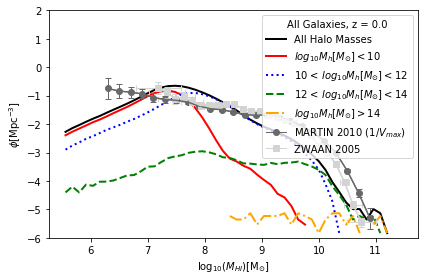

In [6]:
fig, ax = plt.subplots(1, 1)

label_z = ("All Galaxies, z = " + str(redshift_used))
label_a = ("$log_{10}M_{h}[M_{\odot}] < 10$")
label_b = ("10 < $log_{10}M_{h}[M_{\odot}] < 12$")
label_c = ("12 < $log_{10}M_{h}[M_{\odot}] < 14$")
label_d = ("$log_{10}M_{h}[M_{\odot}] > 14$")
label_All = ("All Halo Masses")

# DRAGONS
# ALL MASSES
x_All = himf[:,0] # HI MASS
y_All = np.log10(himf[:,1]) # HIMF
ax.plot(x_All, y_All, color='black', lw=2,label=label_All)
# MHI Mo <= 10 
x_a = himf_a[:,0] # HI MASS
y_a = np.log10(himf_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='red', lw=2,label=label_a)
# 10 < MHI Mo <= 12
x_b = himf_b[:,0] # HI MASS
y_b = np.log10(himf_b[:,1]) # HIMF
ax.plot(x_b, y_b, color='blue', linestyle='dotted', lw=2,label=label_b)
# 12 < MHI Mo <= 14
x_c = himf_c[:,0] # HI MASS
y_c = np.log10(himf_c[:,1]) # HIMF
ax.plot(x_c, y_c, color='green', linestyle='dashed', lw=2,label=label_c)
# MHI Mo > 14 
x_d = himf_d[:,0] # HI MASS
y_d = np.log10(himf_d[:,1]) # HIMF
ax.plot(x_d, y_d, color='orange', linestyle='dashdot', lw=2,label=label_d)

label_MARTIN = ("MARTIN 2010 (1/$V_{max}$)")
label_ZWAAN =('ZWAAN 2005')

# MARTIN 2010
# log_MHI_MV = data_MV[:,0]
# log_HIMF_MV = data_MV[:,1]
ax.plot(log_MHI_MV, log_HIMF_MV, marker='o',color='dimgray',lw=1,
        label=label_MARTIN)
ax.errorbar(log_MHI_MV, log_HIMF_MV,xerr=None,yerr=HIMF_MV_err, 
            color='dimgray',elinewidth=1,capsize=3)

# ZWAAN 2005
#log_MHI_Zwaan = data_Zwaan[:,0]
ax.plot(log_MHI_Zwaan, log_HIMF_Zwaan, marker='s',color='lightgray',
        lw=1, label=label_ZWAAN) # change to np.random.rand(3,) for random colours
ax.errorbar(log_MHI_Zwaan, log_HIMF_Zwaan, xerr=MHI_Zwaan_err, yerr=HIMF_Zwaan_err,
            color='lightgray',elinewidth=1,capsize=3)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\phi [{\rm Mpc^{-3}}]$")
ax.set_ylim([-6,2])
# Add the legend
ax.legend(title=label_z, loc="upper right")

''' FOR LEGEND OUTSIDE 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend([label_All,label_a,label_c,label_c,label_d], loc='center left', bbox_to_anchor=(legend_x, legend_y))
'''
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("HIMF_Mvir_sepbymass_AllGalaxies_wDATA")
plt.savefig("final_plots/HIMF/HaloMassFunction/" + name_of_plot + ".pdf")

## Plot the HIMFs for the different Mvir mass ranges for
# CENTRALS ONLY : NOTE [Type==0] 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


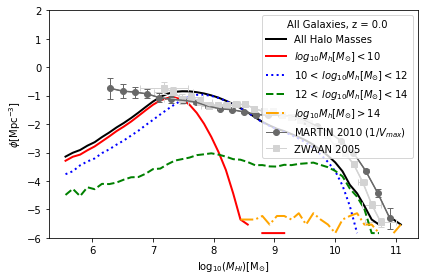

In [7]:
# FULL PLOT FOR DRAGONS, For the different Mvir mass ranges
# CENTRALS ONLY : NOTE [Type==0] 
fig, ax = plt.subplots(1, 1)

# DRAGONS
# ALL MASSES
x_All = himf_Cen[:,0] # HI MASS
y_All = np.log10(himf_Cen[:,1]) # HIMF
ax.plot(x_All, y_All, color='black', lw=2,label=label_All)
# MHI Mo <= 10 
x_a = himf_Cen_a[:,0] # HI MASS
y_a = np.log10(himf_Cen_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='red', lw=2,label=label_a)
# 10 < MHI Mo <= 12
x_b = himf_Cen_b[:,0] # HI MASS
y_b = np.log10(himf_Cen_b[:,1]) # HIMF
ax.plot(x_b, y_b, color='blue', linestyle='dotted', lw=2,label=label_b)
# 12 < MHI Mo <= 14
x_c = himf_Cen_c[:,0] # HI MASS
y_c = np.log10(himf_Cen_c[:,1]) # HIMF
ax.plot(x_c, y_c, color='green', linestyle='dashed', lw=2,label=label_c)
# MHI Mo > 14 
x_d = himf_Cen_d[:,0] # HI MASS
y_d = np.log10(himf_Cen_d[:,1]) # HIMF
ax.plot(x_d, y_d, color='orange', linestyle='dashdot', lw=2,label=label_d)

label_MARTIN = ("MARTIN 2010 (1/$V_{max}$)")
label_ZWAAN =('ZWAAN 2005')

# MARTIN 2010
# log_MHI_MV = data_MV[:,0]
# log_HIMF_MV = data_MV[:,1]
ax.plot(log_MHI_MV, log_HIMF_MV, marker='o',color='dimgray',lw=1,
        label=label_MARTIN)
ax.errorbar(log_MHI_MV, log_HIMF_MV,xerr=None,yerr=HIMF_MV_err, 
            color='dimgray',elinewidth=1,capsize=3)

# ZWAAN 2005
#log_MHI_Zwaan = data_Zwaan[:,0]
ax.plot(log_MHI_Zwaan, log_HIMF_Zwaan, marker='s',color='lightgray',
        lw=1, label=label_ZWAAN) # change to np.random.rand(3,) for random colours
ax.errorbar(log_MHI_Zwaan, log_HIMF_Zwaan, xerr=MHI_Zwaan_err, yerr=HIMF_Zwaan_err,
            color='lightgray',elinewidth=1,capsize=3)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\phi [{\rm Mpc^{-3}}]$")
ax.set_ylim([-6,2])
# Add the legend
ax.legend(title=label_z, loc="upper right")

''' FOR LEGEND OUTSIDE 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend([label_All,label_a,label_c,label_c,label_d], loc='center left', bbox_to_anchor=(legend_x, legend_y))
'''
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("HIMF_Mvir_sepbymass_Centrals_wDATA")
plt.savefig("final_plots/HIMF/HaloMassFunction/" + name_of_plot + ".pdf")

## Plot the HIMFs for the different Mvir mass ranges for
# SATELLITES ONLY : NOTE [Type==1] 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


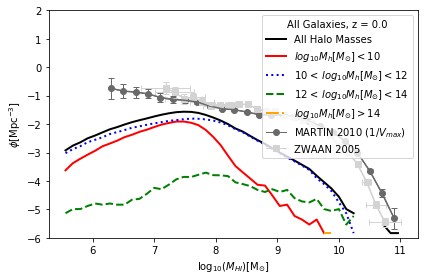

In [8]:
# FULL PLOT FOR DRAGONS, For the different Mvir mass ranges
# SATELLITES ONLY : NOTE [Type==1] 
fig, ax = plt.subplots(1, 1)

# DRAGONS
# ALL MASSES
x_All = himf_Sat[:,0] # HI MASS
y_All = np.log10(himf_Sat[:,1]) # HIMF
ax.plot(x_All, y_All, color='black', lw=2,label=label_All)
# MHI Mo <= 10 
x_a = himf_Sat_a[:,0] # HI MASS
y_a = np.log10(himf_Sat_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='red', lw=2,label=label_a)
# 10 < MHI Mo <= 12
x_b = himf_Sat_b[:,0] # HI MASS
y_b = np.log10(himf_Sat_b[:,1]) # HIMF
ax.plot(x_b, y_b, color='blue', linestyle='dotted', lw=2,label=label_b)
# 12 < MHI Mo <= 14
x_c = himf_Sat_c[:,0] # HI MASS
y_c = np.log10(himf_Sat_c[:,1]) # HIMF
ax.plot(x_c, y_c, color='green', linestyle='dashed', lw=2,label=label_c)
# MHI Mo > 14 
x_d = himf_Sat_d[:,0] # HI MASS
y_d = np.log10(himf_Sat_d[:,1]) # HIMF
ax.plot(x_d, y_d, color='orange', linestyle='dashdot', lw=2,label=label_d)

label_MARTIN = ("MARTIN 2010 (1/$V_{max}$)")
label_ZWAAN =('ZWAAN 2005')

# MARTIN 2010
# log_MHI_MV = data_MV[:,0]
# log_HIMF_MV = data_MV[:,1]
ax.plot(log_MHI_MV, log_HIMF_MV, marker='o',color='dimgray',lw=1,
        label=label_MARTIN)
ax.errorbar(log_MHI_MV, log_HIMF_MV,xerr=None,yerr=HIMF_MV_err, 
            color='dimgray',elinewidth=1,capsize=3)

# ZWAAN 2005
#log_MHI_Zwaan = data_Zwaan[:,0]
ax.plot(log_MHI_Zwaan, log_HIMF_Zwaan, marker='s',color='lightgray',
        lw=1, label=label_ZWAAN) # change to np.random.rand(3,) for random colours
ax.errorbar(log_MHI_Zwaan, log_HIMF_Zwaan, xerr=MHI_Zwaan_err, yerr=HIMF_Zwaan_err,
            color='lightgray',elinewidth=1,capsize=3)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\phi [{\rm Mpc^{-3}}]$")
ax.set_ylim([-6,2])
# Add the legend
ax.legend(title=label_z, loc="upper right")

''' FOR LEGEND OUTSIDE 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend([label_All,label_a,label_c,label_c,label_d], loc='center left', bbox_to_anchor=(legend_x, legend_y))
'''
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("HIMF_Mvir_sepbymass_Satellites_wDATA")
plt.savefig("final_plots/HIMF/HaloMassFunction/" + name_of_plot + ".pdf")

## Plot the HIMFs for the different Mvir mass ranges for
# ORPHANS ONLY : NOTE [Type==2] 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


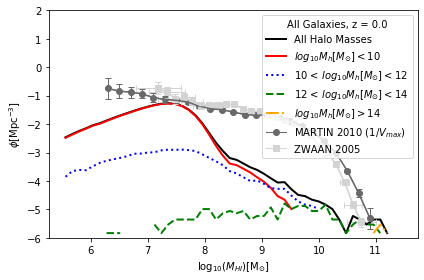

In [9]:
# FULL PLOT FOR DRAGONS, For the different Mvir mass ranges
# ORPHANS ONLY : NOTE [Type==2] 
fig, ax = plt.subplots(1, 1)

# DRAGONS
# ALL MASSES
x_All = himf_Orp[:,0] # HI MASS
y_All = np.log10(himf_Orp[:,1]) # HIMF
ax.plot(x_All, y_All, color='black', lw=2,label=label_All)
# MHI Mo <= 10 
x_a = himf_Orp_a[:,0] # HI MASS
y_a = np.log10(himf_Orp_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='red', lw=2,label=label_a)
# 10 < MHI Mo <= 12
x_b = himf_Orp_b[:,0] # HI MASS
y_b = np.log10(himf_Orp_b[:,1]) # HIMF
ax.plot(x_b, y_b, color='blue', linestyle='dotted', lw=2,label=label_b)
# 12 < MHI Mo <= 14
x_c = himf_Orp_c[:,0] # HI MASS
y_c = np.log10(himf_Orp_c[:,1]) # HIMF
ax.plot(x_c, y_c, color='green', linestyle='dashed', lw=2,label=label_c)
# MHI Mo > 14 
x_d = himf_Orp_d[:,0] # HI MASS
y_d = np.log10(himf_Orp_d[:,1]) # HIMF
ax.plot(x_d, y_d, color='orange', linestyle='dashdot', lw=2,label=label_d)
label_MARTIN = ("MARTIN 2010 (1/$V_{max}$)")
label_ZWAAN =('ZWAAN 2005')

# MARTIN 2010
# log_MHI_MV = data_MV[:,0]
# log_HIMF_MV = data_MV[:,1]
ax.plot(log_MHI_MV, log_HIMF_MV, marker='o',color='dimgray',lw=1,
        label=label_MARTIN)
ax.errorbar(log_MHI_MV, log_HIMF_MV,xerr=None,yerr=HIMF_MV_err, 
            color='dimgray',elinewidth=1,capsize=3)

# ZWAAN 2005
#log_MHI_Zwaan = data_Zwaan[:,0]
ax.plot(log_MHI_Zwaan, log_HIMF_Zwaan, marker='s',color='lightgray',
        lw=1, label=label_ZWAAN) # change to np.random.rand(3,) for random colours
ax.errorbar(log_MHI_Zwaan, log_HIMF_Zwaan, xerr=MHI_Zwaan_err, yerr=HIMF_Zwaan_err,
            color='lightgray',elinewidth=1,capsize=3)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\phi [{\rm Mpc^{-3}}]$")
ax.set_ylim([-6,2])
# Add the legend
ax.legend(title=label_z, loc="upper right")

''' FOR LEGEND OUTSIDE 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend([label_All,label_a,label_c,label_c,label_d], loc='center left', bbox_to_anchor=(legend_x, legend_y))
'''
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("HIMF_Mvir_sepbymass_Orphans_wDATA")
plt.savefig("final_plots/HIMF/HaloMassFunction/" + name_of_plot + ".pdf")

## FULL PLOT FOR DRAGONS, For the different Mvir mass ranges
# ALL TYPES, all Mass range < 10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


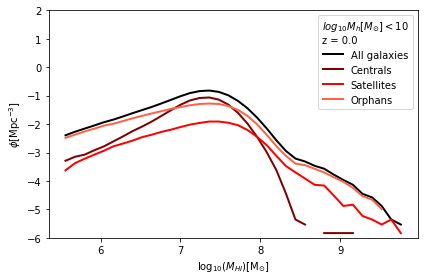

In [11]:
# FULL PLOT FOR DRAGONS, For the Mvir mass range < 10
# ALL TYPES (Cen, Sat, Orph and ALL)
fig, ax = plt.subplots(1, 1)

label_z = ("$log_{10}M_{h}[M_{\odot}] < 10$\nz = " + str(redshift_used))
label_All = ("All galaxies")
label_Cen = ("Centrals")
label_Sat = ("Satellites")
label_Orp = ("Orphans")

# DRAGONS
# ALL
x_a = himf_a[:,0] # HI MASS
y_a = np.log10(himf_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='black', lw=2,label=label_All)
# ORPHANS
x_a = himf_Cen_a[:,0] # HI MASS
y_a = np.log10(himf_Cen_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='maroon', lw=2,label=label_Cen)
# ORPHANS
x_a = himf_Sat_a[:,0] # HI MASS
y_a = np.log10(himf_Sat_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='red', lw=2,label=label_Sat)
# ORPHANS
x_a = himf_Orp_a[:,0] # HI MASS
y_a = np.log10(himf_Orp_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='tomato', lw=2,label=label_Orp)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\phi [{\rm Mpc^{-3}}]$")
ax.set_ylim([-6,2])
# Add the legend
ax.legend(title=label_z, loc="upper right")

''' FOR LEGEND OUTSIDE 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend([label_All,label_a,label_c,label_c,label_d], loc='center left', bbox_to_anchor=(legend_x, legend_y))
'''
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("HIMF_Mvir_sepbymass_lessthanten")
plt.savefig("final_plots/HIMF/HaloMassFunction/" + name_of_plot + ".pdf")